In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#baixar o dataframe e analisar as 5 primeiras entradas
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


A partir desse gráfico, podemos investigar:
- Participação feminina nas olimpiadas
- Nações com mais medalhas
- Atletas com mais idade
- Atletas com menor idade


In [3]:
#Estatísticas básicas do df
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Meu interesse é somente nos jogos olímpicos de verão

In [4]:
df['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [5]:
#O ideal é retirar os jogos de verão de nosso df
dfv = df[df['Season'] == 'Summer']

In [6]:
dfv.shape

(222552, 15)

In [7]:
dfv.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


In [8]:
# Maior idade
print('Quem foi o competidor mais antigo:')
print(' ')
dfv[dfv['Age'] == 97]

Quem foi o competidor mais antigo:
 


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [9]:
print('Quem foi o competidor mais novo:')
print(' ')
dfv[dfv['Age'] == 10]

Quem foi o competidor mais novo:
 


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


<h1>1 - Nações, atletas e modalidades: </h1>

In [10]:
print('30 nações que enviaram mais atletas')
print('-'*40)
dfv['NOC'].value_counts().head(30)

30 nações que enviaram mais atletas
----------------------------------------


USA    15064
GBR    10917
FRA    10633
ITA     8217
GER     7622
AUS     7092
CAN     6860
JPN     6336
HUN     6129
SWE     6076
NED     5164
ESP     4907
POL     4865
URS     4622
CHN     4323
SUI     4003
BRA     3784
ROU     3731
KOR     3692
BEL     3616
RUS     3583
FIN     3558
DEN     3458
TCH     3369
GRE     2993
AUT     2951
BUL     2941
ARG     2913
MEX     2810
NOR     2598
Name: NOC, dtype: int64

-Notamos que as 5 nações que mais enviaram atletas foram: Estados Unidos, Inglaterra, França, Itália e Alemanha

-O Brasil está em 17º colocado nas nações que mais enviou atletas

<h3> 1.1 - Evolução da quantidade de Nações e atletas ao longo dos anos</h3>

Quantidade de nações que já participaram das olimpíadas:

In [11]:
#Quantas nações já participaram das olimpíadas?
len(dfv['NOC'].unique())

230

Passos para analisar evolução da quantidade de nações:

-Criar lista com os anos

-Gerar outra lista com a quantidade de nações de cada ano

-Criar um dataframe

-Gerar gráficos

<h4>1.1.1 - Número de nações:</h4>

In [12]:
#lista com os anos
ano = []
for c in dfv['Year']:
    if c not in ano:
        ano.append(c)
ano.sort()

In [13]:
#lista com a quantidade de nações de cada ano
nacoes_qtdade = []
for b in ano:
    a = dfv[dfv['Year'] == b]
    nacoes_qtdade.append(len(a['NOC'].unique()))

In [14]:
#criação de um Dataframe com as listas geradas:
df_nacoes_ano = pd.DataFrame(list(zip(ano,nacoes_qtdade)), columns = ['Ano', 'Quantidade_Nações'])
df_nacoes_ano.head()

,Ano,Quantidade_Nações
0,1896,12
1,1900,31
2,1904,15
3,1906,21
4,1908,22


In [15]:
#Transformando a coluna Ano no index
df_nacoes_ano.set_index('Ano', inplace = True)

In [16]:
from matplotlib.pyplot import figure
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

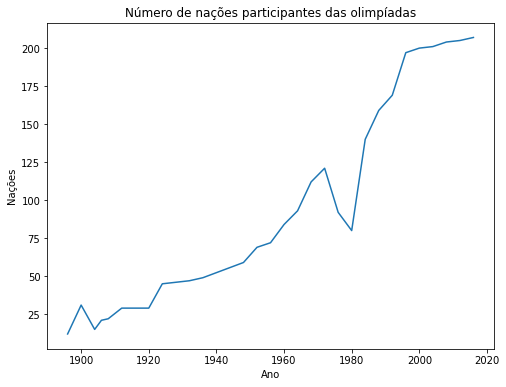

In [17]:
figure(figsize=(8, 6))
plt.title('Número de nações participantes das olimpíadas')
plt.ylabel('Nações')
plt.xlabel('Ano')
plt.plot(df_nacoes_ano)
plt.show

<AxesSubplot:title={'center':'Naçoes participantes por ano'}, xlabel='Ano'>

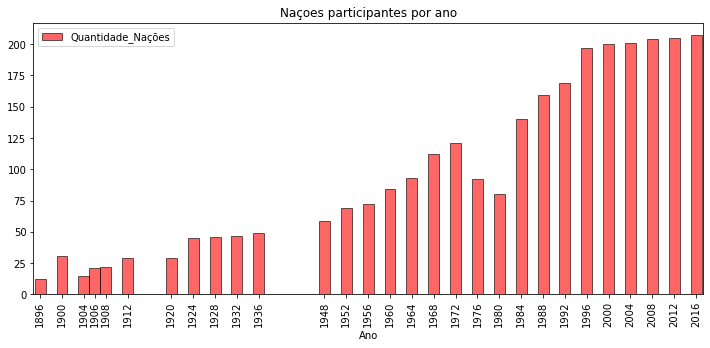

In [18]:
df_nacoes_ano.plot(kind='bar', figsize=(12,5), color='red',edgecolor='k', width=2, title='Naçoes participantes por ano', alpha=0.6)

Pontos notáveis:

- Entre 1904 e 1908 os jogos ocorreram em intervalo de dois em dois anos

- Um enorme buraco entre os anos de 1936 a 1948, muito provavelmente por conta da Segunda Guerra Mundial

- De 1948 a 1972 crescimento do número de nações.

- Crescimento interrompido na edição de 1976, declínio até 1980.

- 1984 marca a volta do crescimento do número de nações até o auge em 2016, no Rio de Janeiro.

Curiosidades:
- As edições de 1900 em Paris e 1904 em St. Lois são consideradas fracassadas por diversos aspectos
- A edição de 1906 "salvou" o espírito olímpico. As "Olimpíadas Intercaladas" não foram reconhecidas pelo COI.
- As olimpiadas de 1916, 1940 e 1944 foram canceladas pelas duas grandes guerras.
- Os jogos de 1972 foi tragicamente marcada por atentado terrorista palestino.
- Já os jogos de 1976 tiveram boicote de boa parte das nações africanas
- 1980, no auge a Guerra Fria, mais um boicote contra a União Soviética


<h4>1.1.2 - Número de atletas:</h4>

In [19]:
#Quantos atletas foram cadastrados em cada ano
dfv['Year'].value_counts()

2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
1992    12977
2012    12920
1988    12037
1972    10304
1984     9454
1976     8641
1968     8588
1952     8270
1960     8119
1964     7702
1980     7191
1936     6506
1948     6405
1924     5233
1956     5127
1928     4992
1920     4292
1912     4040
1908     3101
1932     2969
1900     1936
1906     1733
1904     1301
1896      380
Name: Year, dtype: int64

Como podemos notar, o ano está fora de ordem. Para solicionar esse problema iremos recorrer à criação de um novo DF

<AxesSubplot:>

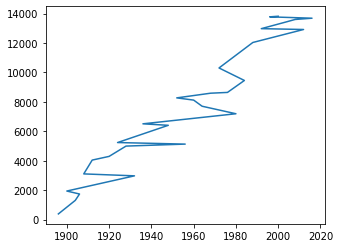

In [20]:
dfv['Year'].value_counts().plot(kind='line', figsize=(5,4))

Como os anos estão fora de ordem, nosso gráfico fica dessa forma estranha

In [21]:
len(dfv[dfv['Year'] == 1908])

3101

In [22]:
atletas = []
for c in ano:
    d = len(dfv[dfv['Year'] == c])
    atletas.append(d)
print(atletas)

[380, 1936, 1301, 1733, 3101, 4040, 4292, 5233, 4992, 2969, 6506, 6405, 8270, 5127, 8119, 7702, 8588, 10304, 8641, 7191, 9454, 12037, 12977, 13780, 13821, 13443, 13602, 12920, 13688]


In [23]:
dfv_atletas = pd.DataFrame(list(zip(ano, atletas)), columns = ['Ano', 'Numero_atletas'])
dfv_atletas.set_index('Ano', inplace = True)

<AxesSubplot:title={'center':'Quantidade de Atletas ao longo dos anos'}, xlabel='Ano'>

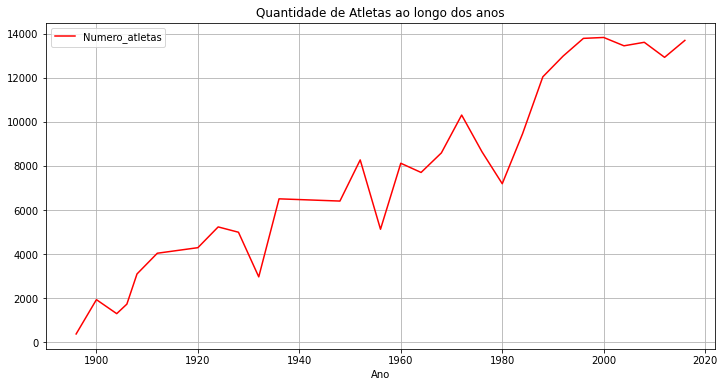

In [24]:
dfv_atletas.plot(kind = 'line', figsize=(12,6), grid = True, title = 'Quantidade de Atletas ao longo dos anos', color = 'red')

<AxesSubplot:title={'center':'Quantidade de atletas ao longo dos anos'}, xlabel='Ano'>

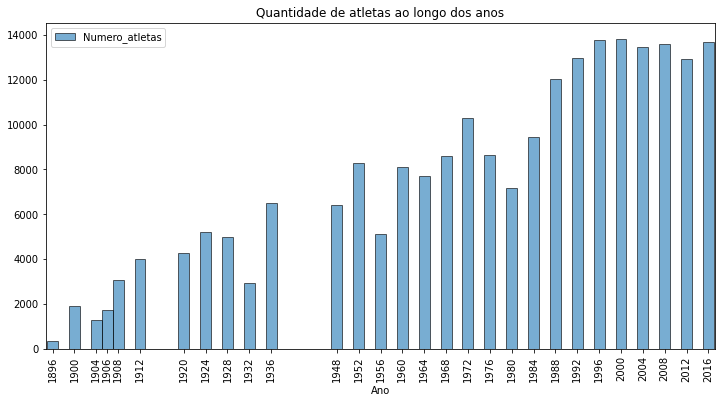

In [25]:
dfv_atletas.plot(kind = 'bar', figsize=(12,6), width = 2, alpha = 0.6, edgecolor = 'k', title = 'Quantidade de atletas ao longo dos anos')

A partir da análise dos gráficos notamos que em alguns anos, apesar do aumento do número de nações, tivemos a diminuição do número de atletas. O que nos leva a levantar a hipótese que o número de atletas pode depender da quantidade de modalidades que cada jogo teve.

<h4>1.1.3 - Sobre as modalidades: </h4>


In [26]:
print('Quantidade de esportes em toda história')
print('-'*40)
dfv['Sport'].value_counts()

Quantidade de esportes em toda história
----------------------------------------


Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Hockey                    5417
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Tennis                    2862
Diving                    2842
Archery                   2334
Table Tennis              1955
Modern Pentathlon         1677
Badminton                 1457
Synchronized Swimming      909
Baseball                   894
Rhythmic Gymnastics        658
Taekwondo                  606
Beach Volleyball           564
Triathlo

In [27]:
dfv['Event'].value_counts()

Football Men's Football                                5733
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
Cycling Men's Road Race, Individual                    2947
                                                       ... 
Archery Men's Target Archery, 28 metres, Individual       2
Sailing Mixed 18 foot                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Croquet Mixed Doubles                                     2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 651, dtype: int64

In [28]:
dfv.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [29]:
x = dfv[dfv['Year'] == 1996]
len(x['Sport'].unique())

31

In [30]:
quantidade_esportes = []
for x in ano:
    y = dfv[dfv['Year'] == x]
    quantidade_esportes.append(len(y['Sport'].unique()))
print(quantidade_esportes)

[9, 20, 18, 13, 24, 17, 25, 20, 17, 18, 24, 20, 19, 19, 19, 21, 20, 23, 23, 23, 25, 27, 29, 31, 34, 34, 34, 32, 34]


In [31]:
#Vamos gerar um unico Dataframe com todas as informações que colhemos
df_quantidades_por_ano = pd.DataFrame(list(zip(ano, atletas, nacoes_qtdade, quantidade_esportes)), columns=['Ano', 'Atletas', 'Delegações', 'Modalidades'])
df_quantidades_por_ano.set_index('Ano', inplace = True)
df_quantidades_por_ano

,Atletas,Delegações,Modalidades
Ano,,,
1896,380,12,9
1900,1936,31,20
1904,1301,15,18
1906,1733,21,13
1908,3101,22,24
1912,4040,29,17
1920,4292,29,25
1924,5233,45,20
1928,4992,46,17


In [32]:
df_quantidades_por_ano.describe()

,Atletas,Delegações,Modalidades
count,29.000000,29.000000,29.000000
mean,7674.206897,96.896552,23.172414
std,4306.660542,68.329739,6.535994
min,380.000000,12.000000,9.000000
25%,4292.000000,45.000000,19.000000
50%,7702.000000,80.000000,23.000000
75%,12037.000000,159.000000,27.000000
max,13821.000000,207.000000,34.000000


<AxesSubplot:title={'center':'Quantidade de modalidade ao longo dos anos'}, xlabel='Ano'>

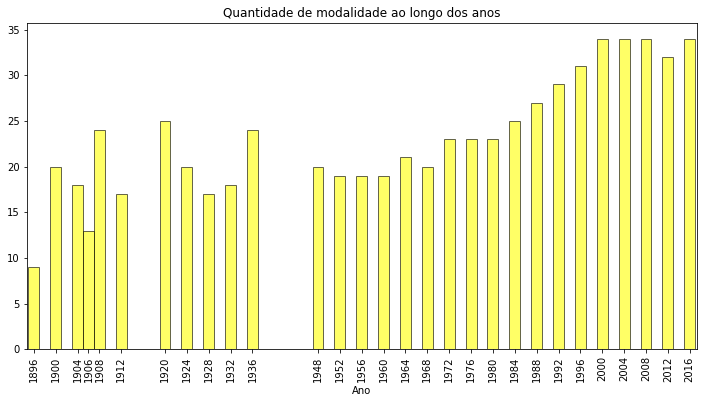

In [33]:
df_quantidades_por_ano['Modalidades'].plot(kind = 'bar', figsize=(12,6), width = 2, alpha = 0.6, edgecolor = 'k', title = 'Quantidade de modalidade ao longo dos anos', color = 'yellow')

<h3>1.2 - Correlação de Pearson:</h3>

A análise de correlação de Pearson busca compreender se há ou não a correlação entre duas, ou mais, variáveis. O de Pearson, ou também chamado de "Coeficiente de Correlação Produto-Momento" ou também de "p de Pearson" mede o grau de correlação e nos indica se são positivos (ou seja, um cresce, outro também) ou negativo (enquanto um cresce, outro decresce).

- +/- 0,9 - 1 = Correlação Muito Forte
- +/- 0,7 a 0,9 = Correlação Forte
- +/- 0,5 a 0,7 = Correlação Moderada
- +/- 0,3 a 0,5 = Correlação Fraca
- +/- 0 a 0,3 = Sem Correlação

In [34]:
correlacao = df_quantidades_por_ano.corr()
correlacao

,Atletas,Delegações,Modalidades
Atletas,1.000000,0.965138,0.869382
Delegações,0.965138,1.000000,0.876659
Modalidades,0.869382,0.876659,1.000000


<h4>1.2.1 - Gráfico de Calor - Correlação de Pearson:</h4>

<AxesSubplot:>

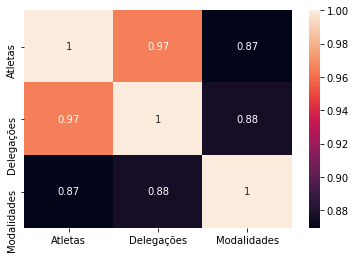

In [35]:
plot = sns.heatmap(correlacao, annot = True)
plot

<h4>1.2.2 - Gráfico de Dispersão:</h4>

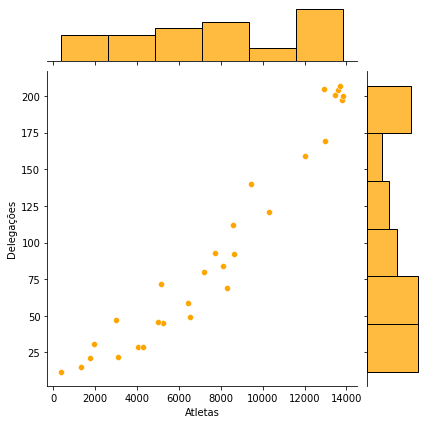

In [36]:
sns.jointplot(x=df_quantidades_por_ano.Atletas, y=df_quantidades_por_ano.Delegações, color = 'orange')

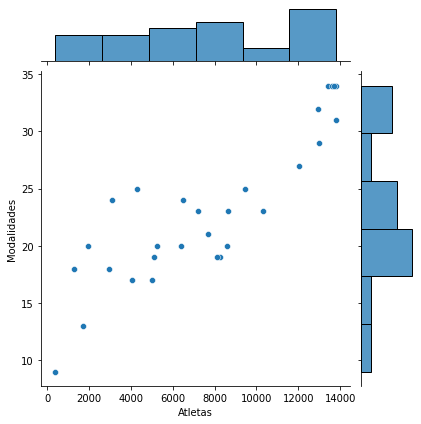

In [37]:
sns.jointplot(x=df_quantidades_por_ano.Atletas, y=df_quantidades_por_ano.Modalidades)

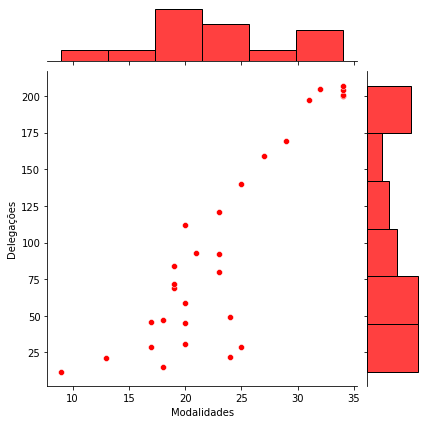

In [38]:
sns.jointplot(x = df_quantidades_por_ano.Modalidades, y = df_quantidades_por_ano.Delegações, color = 'red')

In [39]:
#% de aumento do numero de participantes
qtde_primeiro = dfv[dfv['Year'] == 1896]
qtde_ultimo = dfv[dfv['Year'] == 2016]
a = len(qtde_primeiro['Name'].unique())
b = len(qtde_ultimo['Name'].unique())
print(f'O aumento de participantes da primeira edição até a de 2016 foi de {((b - a)/a)*100}%')

O aumento de participantes da primeira edição até a de 2016 foi de 6248.863636363637%


<h1>2 - Participação Feminina nas Olimpíadas</h1>

Problemas a ser investigado:

- Frequência de mulheres nos jogos
- Evolução da participação feminina
- Primeiras modalidades e o primeiro ouro
- Relação Quantitade de participantes (geral, homens e mulheres)
- Mulher mais nova e a mais velha a competir
- Nações que mais levam, e as que menos levam mulheres

<h3>2.1 - A frequência e a evolução feminina nos jogos</h3>

In [40]:
dfv.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [41]:
#Tabela de Frequência em toad história:
dfv['Sex'].value_counts()

M    163109
F     59443
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Participação em toda história das olimpíadas'}, ylabel='Sex'>

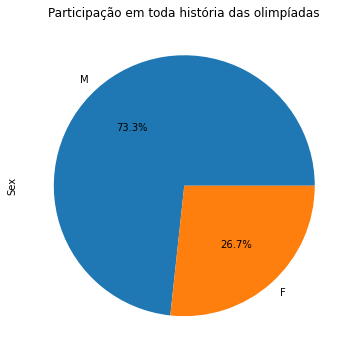

In [42]:
dfv['Sex'].value_counts().plot(kind = 'pie', title='Participação em toda história das olimpíadas', autopct='%1.1f%%', figsize = (6,6))

In [43]:
#Gerar uma tabela - Ano | Mulheres | %Mulheres | Homens | %Homens | Total atletas
sexo_anos = pd.pivot_table(dfv, index=['Year'], values='Name',columns = 'Sex', aggfunc='count', fill_value=0)
sexo_anos

Sex,F,M
Year,,
1896,0,380
1900,33,1903
1904,16,1285
1906,11,1722
1908,47,3054
1912,87,3953
1920,134,4158
1924,244,4989
1928,404,4588


<AxesSubplot:title={'center':'Evolução de participantes'}, xlabel='Year'>

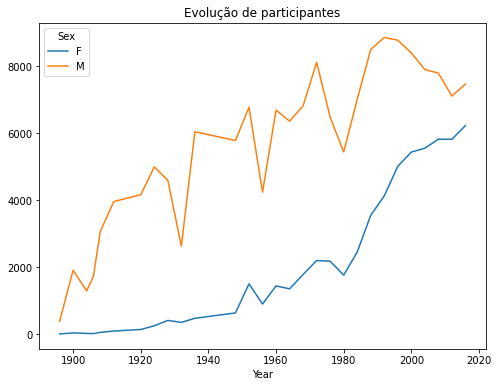

In [44]:
sexo_anos.plot(kind = 'line', figsize = (8,6), title='Evolução de participantes')

<AxesSubplot:title={'center':'Quantidade de Atletas Masculino e Feminino'}, xlabel='Year'>

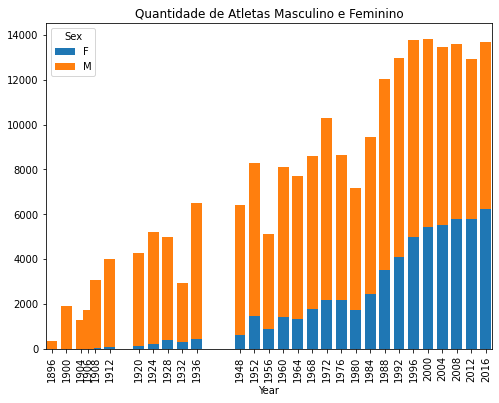

In [45]:
sexo_anos.plot(kind = 'bar', figsize = (8,6), stacked = True, width = 3, title = 'Quantidade de Atletas Masculino e Feminino')

<AxesSubplot:title={'center':'Evolução de participantes'}, xlabel='Year'>

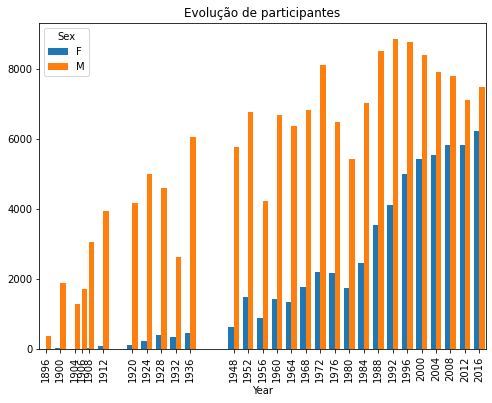

In [46]:
sexo_anos.plot(kind = 'bar', figsize = (8,6), title='Evolução de participantes', width =3)

<h3>2.2 - As primeiras participantes</h3>

In [47]:
ano_1900 = dfv[dfv['Year'] == 1900] #selecionando o ano
ano_1900 = ano_1900[ano_1900['Sex'] == 'F'] #Fatiando mais ainda, selecionando apenas as mulheres

In [48]:
ano_1900.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold


In [49]:
ano_1900.shape #Qual o tamanho dessa tabela

(33, 15)

Sabemos que diferentes ID pode conter a mesma atleta, isso acontece pois um mesmo atleta pode competir em diferentes eventos. Para contabilizar quantas atletas temos no total, realizamos o seguinte código: 

In [50]:
len(ano_1900['Name'].unique())

23

Quais jogos elas competiram?

In [51]:
ano_1900['Sport'].unique()

array(['Golf', 'Tennis', 'Sailing', 'Croquet', 'Equestrianism'],
      dtype=object)

Quais países levaram mulheres?

In [77]:
ano_1900total = dfv[dfv['Year'] == 1900]
print('Quantidade de nações participantes em 1900:')
print(len(ano_1900total['NOC'].unique()))
print('')
print('Nações que levaram mulheres:')
print(len(ano_1900['NOC'].unique()))
print('São eles:')
print(ano_1900['NOC'].unique())

Quantidade de nações participantes em 1900:
31

Nações que levaram mulheres:
6
São eles:
['USA' 'FRA' 'GBR' 'SUI' 'ITA' 'BOH']


Portanto apenas 4 modalidades eram disputadas por mulheres

In [52]:
ano_1900[ano_1900['Medal'] == 'Gold']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold


In [78]:
ano_1900[ano_1900['Medal'] == 'Silver']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver
193036,96920,Yvonne Prvost (-Boppe),F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Silver
193037,96920,Yvonne Prvost (-Boppe),F,NaN,NaN,NaN,France/Great Britain,FRA,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Silver
259872,130096,"Pauline ""Polly"" Whittier (-Iselin)",F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Silver


In [79]:
ano_1900[ano_1900['Medal'] == 'Bronze']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
110161,55702,Marion Jones (-Farquhar),F,20.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Bronze
110162,55702,Marion Jones (-Farquhar),F,20.0,NaN,NaN,United States/Great Britain,USA,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Bronze
192747,96774,"Myra Abigail ""Abbie"" Pratt (Pankhurst-, Wright...",F,41.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Bronze
204337,102589,"Hedwiga Rosenbaumov (Austerlitz-, -Raabe)",F,35.0,NaN,NaN,Bohemia,BOH,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Bronze
204338,102589,"Hedwiga Rosenbaumov (Austerlitz-, -Raabe)",F,35.0,NaN,NaN,Bohemia/Great Britain,BOH,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Bronze


In [85]:
pd.pivot_table(ano_1900, index=['Name','Medal'])

Age      ID  Year
Name                                               Medal                     
Charlotte Reinagle Cooper (-Sterry)                Gold    29.0   22925  1900
Hedwiga Rosenbaumov (Austerlitz-, -Raabe)          Bronze  35.0  102589  1900
Hlne de Pourtals (Barbey-)                         Gold    32.0   26559  1900
                                                   Silver  32.0   26559  1900
Margaret Ives Abbott (-Dunne)                      Gold    23.0     150  1900
Marion Jones (-Farquhar)                           Bronze  20.0   55702  1900
Myra Abigail "Abbie" Pratt (Pankhurst-, Wright-... Bronze  41.0   96774  1900
Pauline "Polly" Whittier (-Iselin)                 Silver  23.0  130096  1900
Yvonne Prvost (-Boppe)                             Silver   NaN   96920  1900

<h3>2.3 - O ano de 1904 - a maior média de idade feminina </h3>

In [53]:
#investigar a média de idade dos anos de 1904 das mulheres
pd.pivot_table(dfv, index=['Year'], values = 'Age', columns = 'Sex', fill_value = 0)

Sex,F,M
Year,,
1896,0.000000,23.580645
1900,29.791667,29.017825
1904,50.230769,26.396450
1906,23.500000,27.139959
1908,33.897436,26.858268
1912,22.379310,27.656834
1920,24.409836,29.470075
1924,26.421053,28.546741
1928,23.510264,29.947856


Comparando as médias de idade entre homens e mulheres, aparentemente não encontramos nenhuma relação. O que é de se ressaltar é a média de idade das mulheres em 1904 (50,23 anos de idade). Cabe uma investigação mais detalhada sobre esse período.

In [54]:
mulheres_1904 = dfv[dfv['Year'] == 1904]
mulheres_1904 = mulheres_1904[mulheres_1904['Sex'] == 'F']
mulheres_1904.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold


In [55]:
mulheres_1904.describe()

,ID,Age,Height,Weight,Year
count,16.000000,13.000000,0.0,0.0,16.0
mean,92111.000000,50.230769,NaN,NaN,1904.0
std,39254.812576,13.565605,NaN,NaN,0.0
min,22877.000000,24.000000,NaN,NaN,1904.0
25%,50366.000000,44.000000,NaN,NaN,1904.0
50%,107413.500000,55.000000,NaN,NaN,1904.0
75%,118922.000000,58.000000,NaN,NaN,1904.0
max,131533.000000,63.000000,NaN,NaN,1904.0


In [56]:
len(mulheres_1904['Name'].unique())

6

In [57]:
import seaborn as sns

O número de ID, ou seja, de competidoras em determinado esporte é maior do que o úmero de participantes. Isso significa que uma mesma participante disputou mais de uma modalidade, o que ocorre até hoje.


<AxesSubplot:>

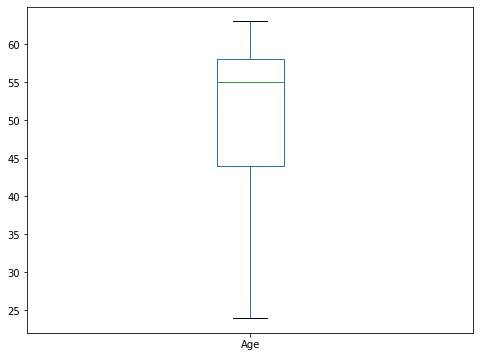

In [58]:
mulheres_1904.boxplot(column = 'Age', grid = False, figsize = (8,6))

In [59]:
#A mais nova desse ano
mulheres_1904[mulheres_1904['Age'] == 24]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
237134,118922,Mabel Caroline Taylor (-Brummel),F,24.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN
237135,118922,Mabel Caroline Taylor (-Brummel),F,24.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN


In [60]:
#A mais velha
mulheres_1904[mulheres_1904['Age'] == 63]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold


In [61]:
#Quais modalidades disputaram
mulheres_1904['Sport'].unique()

array(['Archery'], dtype=object)

In [62]:
#De onde eram
mulheres_1904['NOC'].unique()

array(['USA'], dtype=object)

<h3>2.4 - O ano de 2016</h3>

In [63]:
ano_2016 = dfv[dfv['Year'] == 2016]
ano_2016f = ano_2016[ano_2016['Sex'] == 'F']
ano_2016m = ano_2016[ano_2016['Sex'] == 'M']

In [64]:
m = len(ano_2016m['Name'].unique())
f = len(ano_2016f['Name'].unique())
print('Porcentagem de sexo em 2016')
print('Masculino:')
print(m/(m+f))
print('')
print('Feminino:')
print(f/(f+m))

Porcentagem de sexo em 2016
Masculino:
0.5497583676391623

Feminino:
0.45024163236083764


In [66]:
#Analisando a porcentagem do ano de 2012
ano_2012 = dfv[dfv['Year'] == 2012]
ano_2012f = ano_2012[ano_2012['Sex'] == 'F']
ano_2012m = ano_2012[ano_2012['Sex'] == 'M']

In [67]:
m12 = len(ano_2012m['Name'].unique())
f12 = len(ano_2012f['Name'].unique())
print('Porcentagem de sexo em 2016')
print('Masculino:')
print(m12/(m12+f12))
print('')
print('Feminino:')
print(f12/(f12+m12))

Porcentagem de sexo em 2016
Masculino:
0.5576923076923077

Feminino:
0.4423076923076923


<h3>2.5 - Mulheres de todos os tempos</h3>

- A mais nova
- A mais velha
- Nação que mais levou mulheres
- Maior medalhista

In [87]:
mulheres_todos_os_tempos = dfv[dfv['Sex'] == 'F']
mulheres_todos_os_tempos.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


In [88]:
mulheres_todos_os_tempos.describe()

,ID,Age,Height,Weight,Year
count,59443.000000,59026.000000,53856.000000,53438.000000,59443.000000
mean,69650.260788,23.660997,168.169025,60.087644,1991.897616
std,39009.551405,6.043343,9.312757,10.856051,21.078455
min,8.000000,11.000000,127.000000,25.000000,1900.000000
25%,35926.000000,19.000000,162.000000,53.000000,1980.000000
50%,70070.000000,23.000000,168.000000,59.000000,1996.000000
75%,103154.000000,27.000000,174.000000,66.000000,2008.000000
max,135568.000000,74.000000,213.000000,167.000000,2016.000000


<h4>2.5.1 - Atleta mais nova e a mais velha:</h4>

In [90]:
#atleta mais nova:
mulheres_todos_os_tempos[mulheres_todos_os_tempos['Age'] == 11]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
79024,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
252230,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,NaN
252231,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,NaN
252232,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Individual Medley,NaN
252233,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN


In [91]:
#atleta mais velha:
mulheres_todos_os_tempos[mulheres_todos_os_tempos['Age'] == 74]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
201631,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
201632,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
201633,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
201634,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN


<h4>2.5.2 - Nações e as mulheres</h4>

<AxesSubplot:ylabel='NOC'>

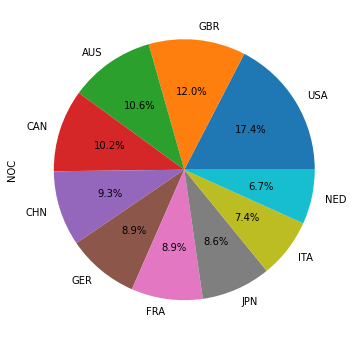

In [105]:
#Nações com mais atletas competindo
mulheres_todos_os_tempos['NOC'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize = (6,6))

In [107]:
mulheres_todos_os_tempos['NOC'].value_counts().head(10)

USA    4239
GBR    2922
AUS    2578
CAN    2486
CHN    2273
GER    2169
FRA    2156
JPN    2097
ITA    1796
NED    1642
Name: NOC, dtype: int64

In [112]:
#paises que levaram menos mulheres
mulheres_todos_os_tempos['NOC'].value_counts().tail(20)

SOM    5
DJI    5
MTN    5
IVB    5
TLS    5
KSA    5
KOS    5
YEM    4
OMA    4
KUW    4
KIR    3
BRU    2
BOH    2
ANZ    2
TUV    2
VNM    2
NRU    2
SSD    1
MAL    1
RHO    1
Name: NOC, dtype: int64

<h4>2.5.3 - Mulheres e as medalhas</h4>

In [114]:
print('Quantidade de medalhas femininas:')
mulheres_todos_os_tempos['Medal'].value_counts()

Quantidade de medalhas femininas:


Bronze    3174
Gold      3140
Silver    3128
Name: Medal, dtype: int64

In [123]:
lista_nomes = mulheres_todos_os_tempos['Name'].unique()
ouro = []
prata = []
bronze = []

for nome in lista_nomes:
    cont_ouro = 0
    cont_prata = 0
    cont_bronze = 0
    get_name = mulheres_todos_os_tempos[mulheres_todos_os_tempos.loc[nome]]
    if get_name['Medal'] == 'Gold':
        cont_ouro += 1
    ouro.append(cont_ouro)


KeyError: 'Cornelia "Cor" Aalten (-Strannood)'